Found 22968 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


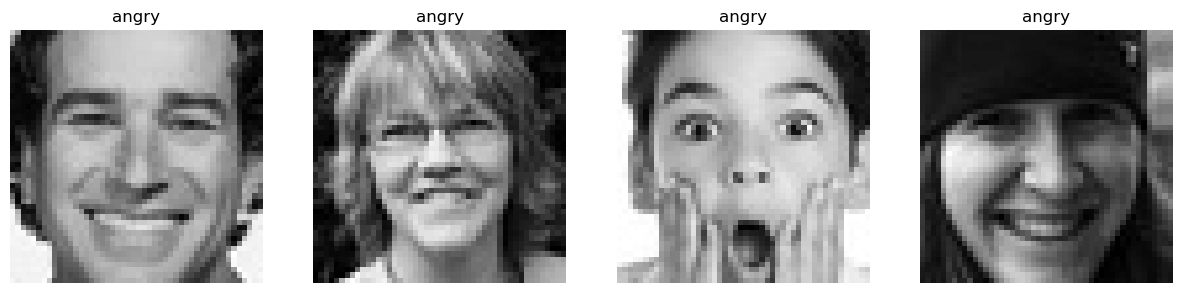

In [3]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from tensorflow.keras.applications import VGG16, InceptionResNetV2
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model
from keras import regularizers
from tensorflow.keras.optimizers import Adam, RMSprop, SGD, Adamax
from keras.utils import plot_model
import random

# Veri Yolları ve Görüntü Boyutu
train_dir = "/Users/mehmetsalihogun/Downloads/fer2013/train"
test_dir = "/Users/mehmetsalihogun/Downloads/fer2013/test"
img_size = 48

# Veri Artırma
train_datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    rescale=1./255,
    validation_split=0.2
)
validation_datagen = ImageDataGenerator(rescale=1./255)

# Veri Yükleyiciler
train_generator = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(img_size, img_size),
    batch_size=32,
    color_mode="grayscale",
    class_mode="categorical",
    subset="training"
)
validation_generator = validation_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(img_size, img_size),
    batch_size=32,
    color_mode="grayscale",
    class_mode="categorical"
)

# Rastgele Örneklerin Görselleştirilmesi
def plot_random_samples(generator, sample_count=5):
    classes = list(generator.class_indices.keys())
    
    # Rastgele örnekler seç
    random_indices = random.sample(range(len(generator.filenames)), sample_count)
    
    plt.figure(figsize=(15, 5))
    
    for i, index in enumerate(random_indices):
        img_path = os.path.join(generator.directory, generator.filenames[index])
        img = image.load_img(img_path, target_size=(img_size, img_size), color_mode="grayscale")
        img_array = image.img_to_array(img) / 255.0
        
        plt.subplot(1, sample_count, i+1)
        plt.imshow(img_array.squeeze(), cmap='gray')
        plt.title(classes[np.argmax(generator.labels[index])])
        plt.axis('off')
    
    plt.show()

# Eğitim veri setinden rastgele örnekler görselleştirin
plot_random_samples(train_generator, sample_count=4)

Found 22968 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


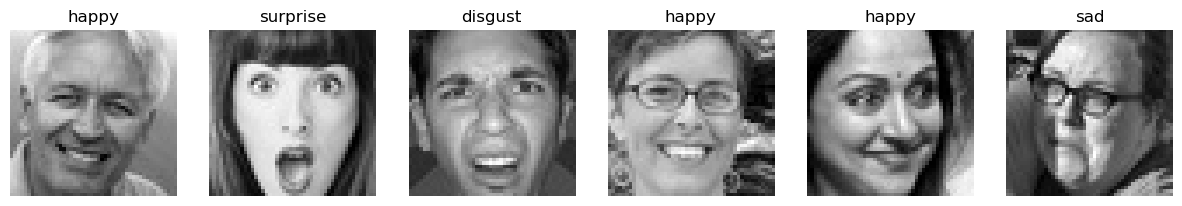

In [7]:
import numpy as np
import os
import matplotlib.pyplot as plt
import random
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Veri Yolları ve Görüntü Boyutu
train_dir = "/Users/mehmetsalihogun/Downloads/fer2013/train"
test_dir = "/Users/mehmetsalihogun/Downloads/fer2013/test"
img_size = 48

# Veri Artırma
train_datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    rescale=1./255,
    validation_split=0.2
)
validation_datagen = ImageDataGenerator(rescale=1./255)

# Veri Yükleyiciler
train_generator = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(img_size, img_size),
    batch_size=32,
    color_mode="grayscale",
    class_mode="categorical",
    subset="training"
)
validation_generator = validation_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(img_size, img_size),
    batch_size=32,
    color_mode="grayscale",
    class_mode="categorical"
)

# Rastgele Örneklerin Görselleştirilmesi
def plot_random_samples(generator, sample_count=5):
    classes = list(generator.class_indices.keys())
    
    # Rastgele örnekler seç
    random_indices = random.sample(range(len(generator.filenames)), sample_count)
    
    plt.figure(figsize=(15, 5))
    
    for i, index in enumerate(random_indices):
        img_path = os.path.join(generator.directory, generator.filenames[index])
        img = image.load_img(img_path, target_size=(img_size, img_size), color_mode="grayscale")
        img_array = image.img_to_array(img) / 255.0
        
        plt.subplot(1, sample_count, i+1)
        plt.imshow(img_array.squeeze(), cmap='gray')
        
        # Gerçek etiketleri almak için dosya yolu kullanılır
        class_name = os.path.basename(os.path.dirname(img_path))
        plt.title(class_name)
        plt.axis('off')
    
    plt.show()

# Eğitim veri setinden rastgele örnekler görselleştirin
plot_random_samples(train_generator, sample_count=6)

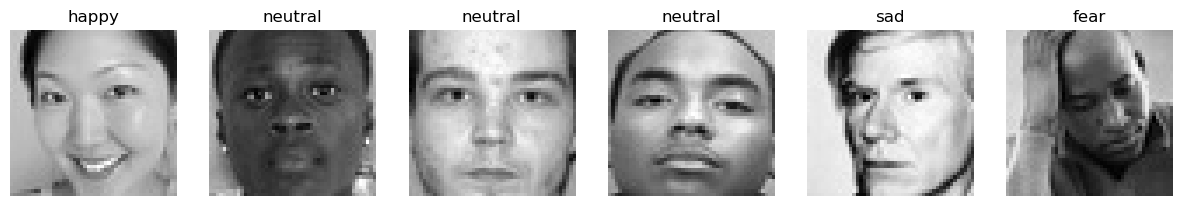

In [8]:
plot_random_samples(train_generator, sample_count=6)

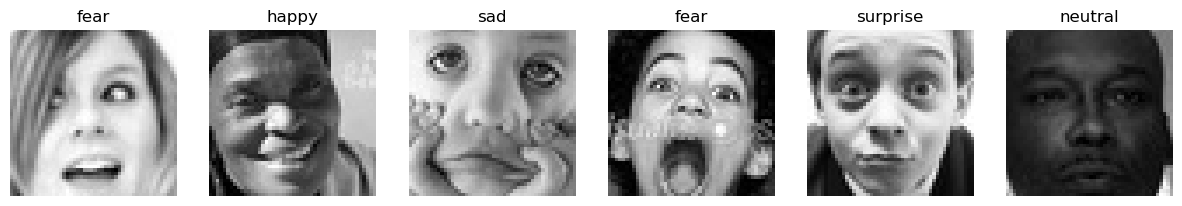

In [9]:
plot_random_samples(train_generator, sample_count=6)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


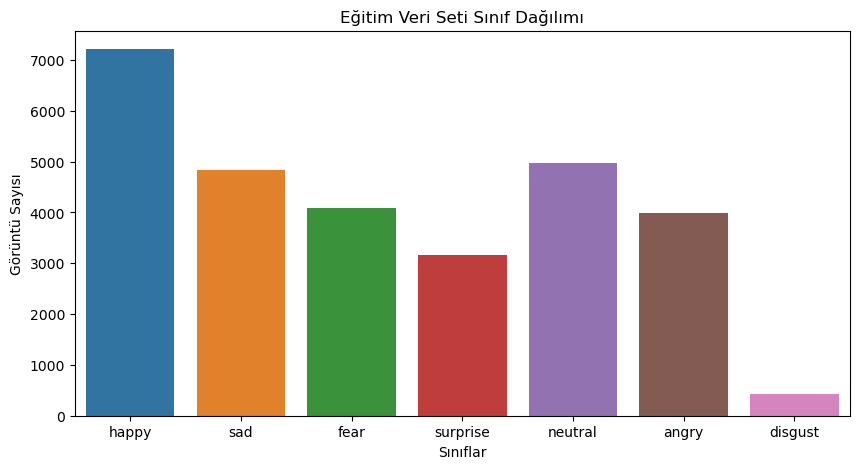

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


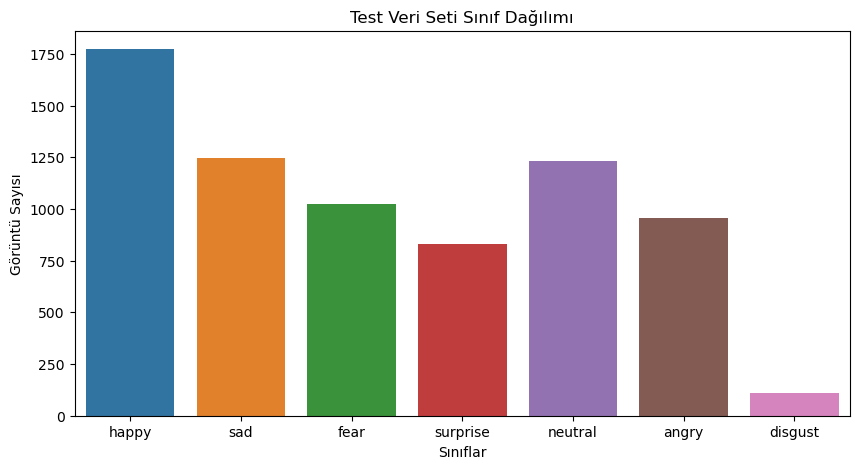

In [10]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Veri Yolları ve Görüntü Boyutu
train_dir = "/Users/mehmetsalihogun/Downloads/fer2013/train"
test_dir = "/Users/mehmetsalihogun/Downloads/fer2013/test"
img_size = 48

def count_images_in_directory(directory):
    class_counts = {}
    for class_dir in os.listdir(directory):
        class_path = os.path.join(directory, class_dir)
        if os.path.isdir(class_path):
            class_counts[class_dir] = len(os.listdir(class_path))
    return class_counts

# Eğitim ve test veri setlerindeki sınıf dağılımlarını hesapla
train_class_counts = count_images_in_directory(train_dir)
test_class_counts = count_images_in_directory(test_dir)

# Eğitim veri seti dağılımını gösteren grafik
plt.figure(figsize=(10, 5))
sns.barplot(x=list(train_class_counts.keys()), y=list(train_class_counts.values()))
plt.title('Eğitim Veri Seti Sınıf Dağılımı')
plt.xlabel('Sınıflar')
plt.ylabel('Görüntü Sayısı')
plt.show()

# Test veri seti dağılımını gösteren grafik
plt.figure(figsize=(10, 5))
sns.barplot(x=list(test_class_counts.keys()), y=list(test_class_counts.values()))
plt.title('Test Veri Seti Sınıf Dağılımı')
plt.xlabel('Sınıflar')
plt.ylabel('Görüntü Sayısı')
plt.show()